In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import pickle

In [11]:
model = keras.models.load_model('./EP')

In [17]:
def extract_training_proc():
    df = pd.read_csv("./logs/training.log", sep = "\t")
    return df

In [18]:
df = extract_training_proc()

In [22]:
print(df)

     Step           MAE            R2
0       0  46426.324219 -1.067491e+09
1      10  44380.628906 -1.055046e+09
2      20  50776.667969 -1.098069e+09
3      30  35339.164062 -1.028440e+09
4      40  40903.613281 -1.037819e+09
..    ...           ...           ...
495  4950  39804.039062 -6.778945e+08
496  4960  34470.691406 -6.492676e+08
497  4970  35082.136719 -6.510766e+08
498  4980  34921.375000 -6.497753e+08
499  4990  34826.082031 -6.487495e+08

[500 rows x 3 columns]


In [63]:
def plot_loss(df):
    fig = plt.figure(figsize = (16, 8))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(df['Step'], df['MAE'], label='Mean Absolute Error', linewidth = 1, color='red')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Mean Absolute Error')
    plt.grid(True)
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(df['Step'], df['R2'], label='R2', linewidth = 1, color = 'blue')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('R2')
    plt.grid(True)
    
    fig.legend()
    plt.savefig("images/training_metrics.png")

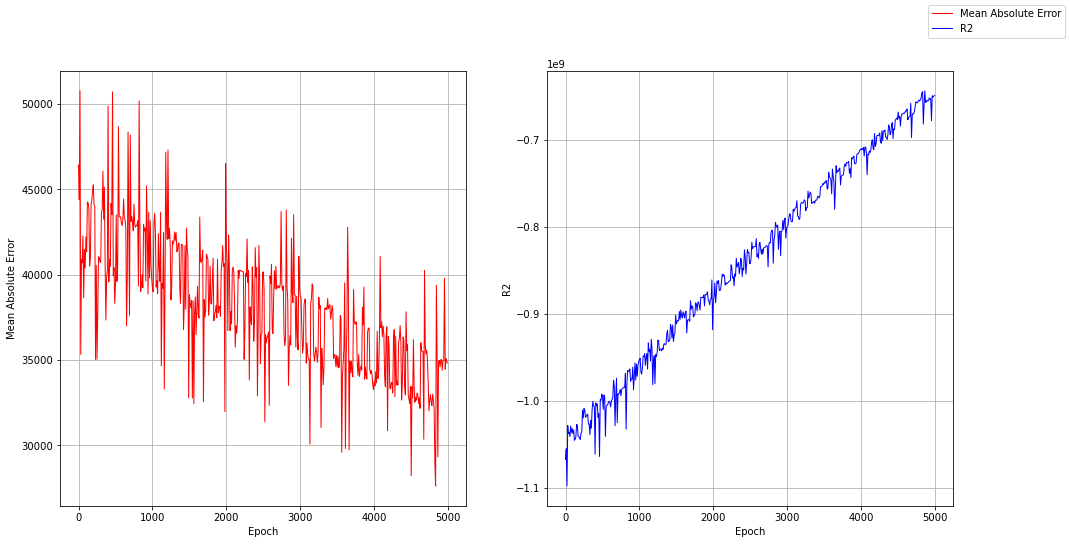

In [64]:
plot_loss(df)

In [57]:
test_data = np.load('test_data.npy')
test_labels = np.load('test_labels.npy')

test_prediction = model.predict(test_data)

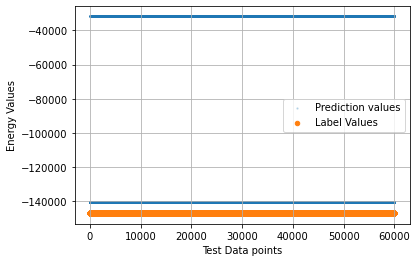

In [59]:
plt.scatter(np.arange(test_prediction.shape[0]), test_prediction, label='Prediction values', alpha = 0.2, s = 2)
plt.scatter(np.arange(test_labels.shape[0]), test_labels, label='Label Values', s = 20)
plt.xlabel('Test Data points')
plt.ylabel('Energy Values')
plt.legend()
plt.grid(True)
plt.savefig("images/pred_true.png")